# Задача 5
# Вариант 7

Условия задания

$F(p) = \frac{\sqrt[3]{p}}{p^2-1}$

Входные данные

In [1]:
import numpy as np
from sympy import diff
from sympy.abc import p
import math
import matplotlib.pyplot as plt


F = p ** (1/3) / (p ** 2 - 1)

Функция вычисляющая $W_n(f,t)$

In [2]:
cache_diff = [diff(F, p, 1)]
def W(n, t: float):
    if len(cache_diff) < n:
        for i in range(n - len(cache_diff)):
            cache_diff.append(diff(cache_diff[-1], p, 1))
    differ = cache_diff[n - 1].evalf(subs={p: n / t})
    return (-1) ** (n % 2) * (n / t) ** (n + 1) / math.factorial(n) * differ


Вычисление методом Виддера без ускорения сходимости и вывод количества итерация для получения точности $\epsilon = 10^{-4}$

In [3]:
n = 1
t = 0.5
epsilon = 10 ** (-4)
delta = None
prev_num = W(n, t)

while delta is None or delta > epsilon:
    n += 1
    new_num = W(n, t)
    delta = abs(prev_num - new_num)
    prev_num = new_num

print(f"n = {n}")

x_line = np.linspace(2, 3, 100)
default_line = np.array([W(n, x) for x in x_line])

n = 39


Реализация метода Виддера с ускорением

In [4]:
def W_boost(n, k, t):
    test = [5 * i + 1 for i in range(k)]
    D = sorted([rnd / n for rnd in test])
    C = []

    for j in range(k):
        ans = 1
        for i in range(n):
            if i == j:
                continue
            ans *= D[j] / (D[j] - D[i])
        C.append(ans)

    ans = 0
    for i in range(k):
        ans += C[i] * W(int(n * D[i]), t)
    return ans


Вывод количества шагов для получения точности $\epsilon = 10^{-4}$

In [5]:
n_boost = 2
t = 0.5
delta_boost = None
prev_num_boost = W_boost(n_boost, n_boost, t)

while delta_boost is None or delta_boost > epsilon:
    n_boost += 1
    new_num = W_boost(n_boost, n_boost, t)
    delta_boost = abs(prev_num_boost - new_num)
    prev_num_boost = new_num

boost_line = np.array([W_boost(n_boost, n_boost, x) for x in x_line])
print(f"n = {n_boost}")

n = 6


Вывод графиков для обоих методов

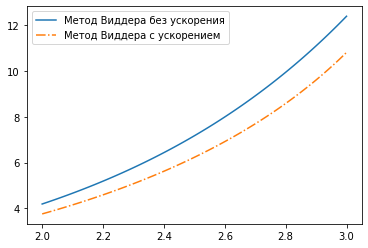

In [6]:
plt.plot(x_line, default_line, "-", label="Метод Виддера без ускорения")
plt.plot(x_line, boost_line, "-.", label="Метод Виддера с ускорением")
plt.legend()
plt.show()